# Frequency Response of a Low Pass Filter

### Some code setup

In [1]:
%pylab inline
import circuits as ec
from circuits import diagram,VS,W
π=pi

Populating the interactive namespace from numpy and matplotlib


### The RC lowpass filter

We will consider as an example the following RC circuit with a voltage source.

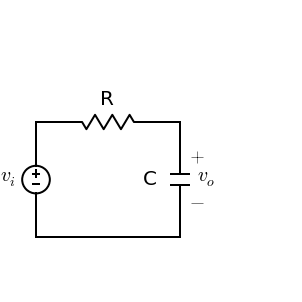

In [2]:
diagram([VS('AE','$v_i$'),ec.R('EG','R'),ec.C('CG','C','$v_o$'),W('AC')]);

## Frequency Response Notation

When the input voltage is $$v_i(t)=A\cos(\omega t +\phi)$$
the output voltage will be $$v_o(t)= |H(\omega)| A \cos(\omega t + \phi + \theta(\omega))$$

The system produces an *output* which is larger than the *input* by the factor $|H(\omega)|$. 
This  called the *magnitude gain* of the system 

The system also introduces a time delay which can be described by a *phase shift* $\theta(\omega)$

In the phasor domain, the input is described as $$\vec{V_i} = Ae^{j\phi}$$ and the output will be 
$$\vec{V_o} = H(\omega) \vec{V_i}$$
where $H(\omega)$ is called the *frequency response* or *transfer function* of the "system" or circuit.

The magnitude and phase of $H$ correspond to the magnitude gain and phase shift:
$$H(\omega) = |H(\omega)| e^{j\theta(\omega)}$$


## Response of this Circuit

The above description is general and applies to all linear circuits modeled as having an input and output. We will now analyse this particular circuit and plot its frequency response. 

Here is the circuit in the phasor domain with the impedances of R and C shown:

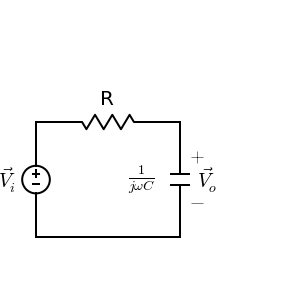

In [3]:
diagram([VS('AE',r'$\vec{V_i}$'),
        ec.R('EG','R'),ec.C('CG',r'$\frac{1}{j\omega C}$',r'$\vec{V_o}$'),
        W('AC')]);

Applying voltage division,
$$ \vec{V_o} = \frac{\frac{1}{j\omega C}}{R+\frac{1}{j\omega C}}\vec{V_i}=H(\omega)\vec{V_i}$$
and solving for $H(\omega)$:
$$ H(\omega) = \frac{1}{1+j\omega (RC)}$$

## Plotting H(ω)

Lets pick realistic component values: R is 1 k$\Omega$ and C is 1 $\mu$F.

In [4]:
R=1000
C=1e-6

Here is a basic plot.

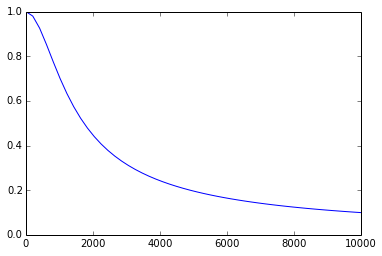

In [5]:
ω=linspace(0,10000)
H=1/(1+1j*ω*R*C)
plot(ω,abs(H));

This plot shows us that the gain is larger at low frequencies, and so this circuit is a *lowpass filter*.

However, the plot could be improved in a few ways. First, let's label it and add a grid.

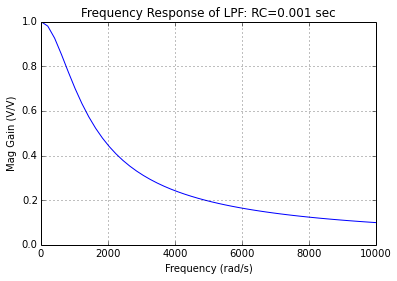

In [6]:
plot(ω,abs(H))
grid()
xlabel('Frequency (rad/s)')
ylabel('Mag Gain (V/V)')
title('Frequency Response of LPF: RC={} sec'.format(R*C));

Here are some criticisms of this graph:
    
- it is too small
- it is not clear what happens at higher frequencies
- there is not a lot of detail at smaller frequencies (near 0)
- it is not clear how this graph relates to the value of RC.


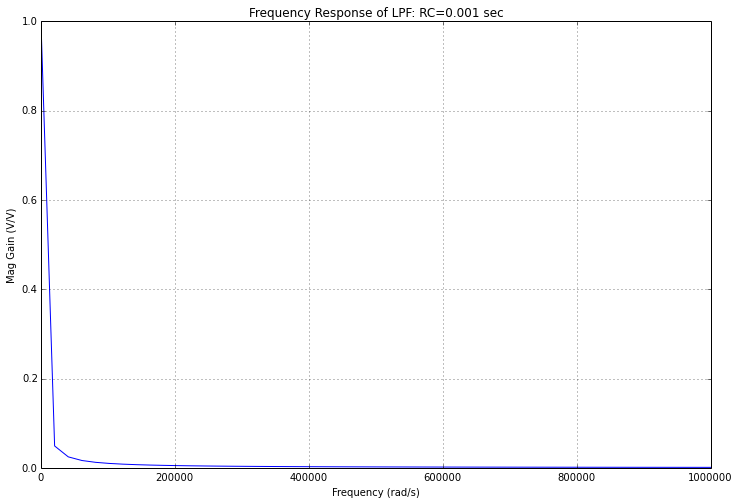

In [7]:
figure(figsize=(12,8))
ω=linspace(0,1e6)
H=1/(1+1j*ω*R*C)
plot(ω,abs(H))
grid()
xlabel('Frequency (rad/s)')
ylabel('Mag Gain (V/V)')
title('Frequency Response of LPF: RC={} sec'.format(R*C));

The graph above fixes two of the four issues (size of the graph, and behavior of the circuit at much higher frequencies), but introduces another problem: the graph is rough. Also, the graph around 0 rad/s is now worse. 

Switching to a log scale for frequency will improve the situation.

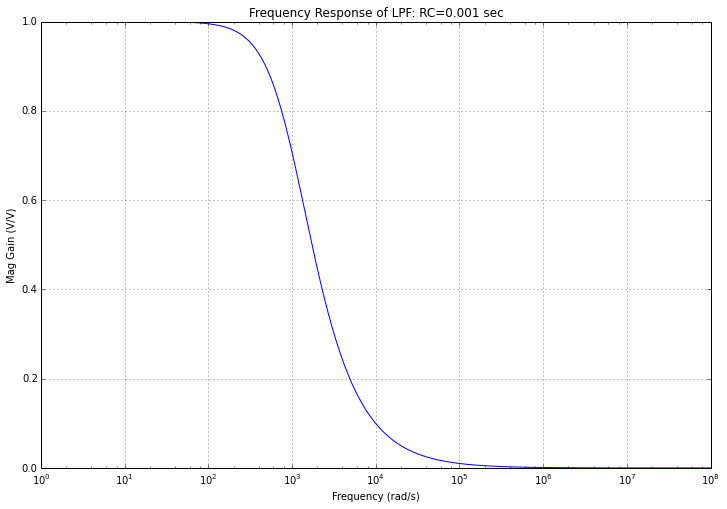

In [8]:
figure(figsize=(12,8))
ω=logspace(0,8,1000)  ## <- NEW
H=1/(1+1j*ω*R*C)
semilogx(ω,abs(H)) ## <- NEW
grid()
xlabel('Frequency (rad/s)')
ylabel('Mag Gain (V/V)')
title('Frequency Response of LPF: RC={} sec'.format(R*C));


This graph is better, but it will be even better if instead of graphing the magnitude gain $|H|$ in linear units, we switch to decibels as follows:

$$ H_{dB} = 20 \log_{10} |H|$$

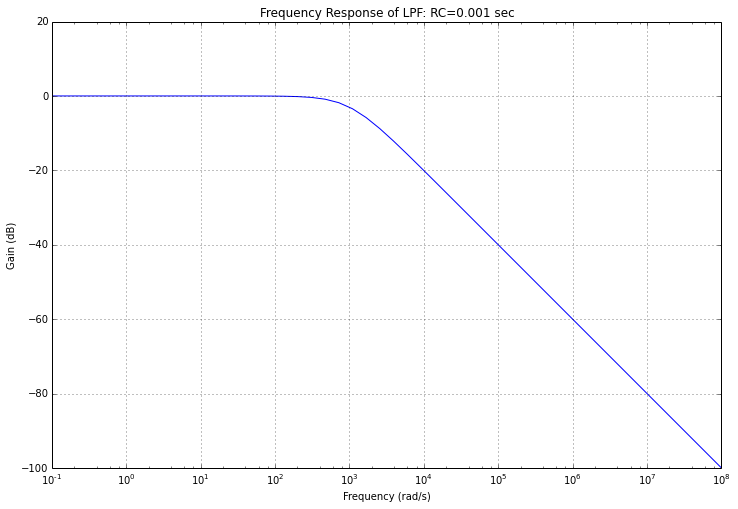

In [9]:
figure(figsize=(12,8))
ω=logspace(-1,8)      # <- changed to extend down to 1e-1
H=1/(1+1j*ω*R*C)
HdB=20*log10(abs(H)) # <- NEW
semilogx(ω,HdB)      # <- changed to use HdB
ylim(-100,20)        # <- NEW
grid()
xlabel('Frequency (rad/s)')
ylabel('Gain (dB)')  # <- new units for this axis

title('Frequency Response of LPF: RC={} sec'.format(R*C));

The scale factor 20 is used so that this graph can be used to compare *output power* to *input power*.

A "bel" is defined as a ratio of power

$$PowerRatio (\mbox{in bels}) = \log_{10} \frac{Power One}{Power Two}$$

and so

$$PowerRatio (\mbox{in decibels}) = 10 \log_{10} \frac{Power One}{Power Two}$$

Since power is proportional to voltage squared, and $H$ is a ratio of amplitudes, the correct scale factor for $H$ in dB is 20.

## Bode plot

This last plot is called a "Bode plot" or sometimes a "gain Bode plot" and it has several advantages:
 - we see more detail at low frequencies
 - we see more detail at high frequencies
 - we can see that the response at high frequencies continues to get smaller and is a *straight line on this plot*
 - the frequency 1000 rad/s has a much clearer role: it is the frequency at which the two straight lines "intersect"
 - this value is called the "corner frequency" or "cutoff frequency" or "3-dB frequency"
 
This time, we will do both an AMPLITUDE and a PHASE Bode plot.


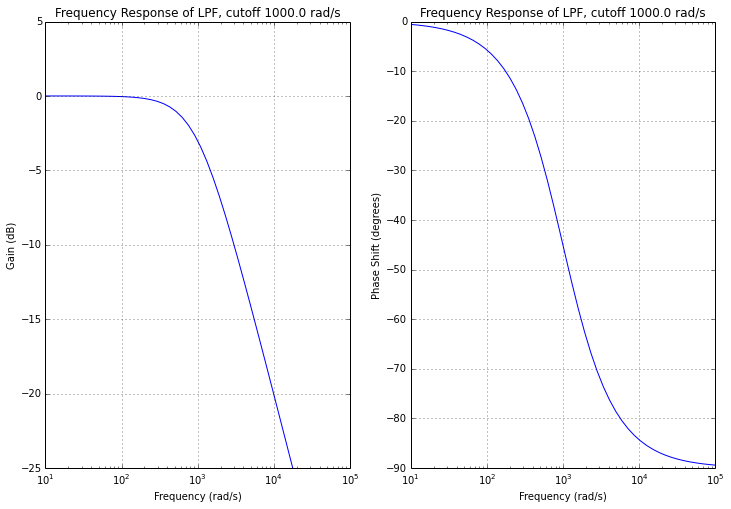

In [10]:
figure(figsize=(12,8))
ω=logspace(1,5)      # <- changed to extend down to 1e-1
H=1/(1+1j*ω*R*C)

subplot(121)
HdB=20*log10(abs(H)) 
semilogx(ω,HdB)      
grid()
ylim(-25,5)        
xlabel('Frequency (rad/s)')
ylabel('Gain (dB)')  # <- new units for this axis
title('Frequency Response of LPF, cutoff {} rad/s'.format(1/(R*C)));

subplot(122)
semilogx(ω,angle(H)*180/π)
grid()
xlabel('Frequency (rad/s)')
ylabel('Phase Shift (degrees)')  # <- new units for this axis
title('Frequency Response of LPF, cutoff {} rad/s'.format(1/(R*C)));

In [11]:
a=1e4
ω1=100
ω2=10000
ω=logspace(0,7)
s=1j*ω
H=a * s / (s+ω1) / (s+ω2)
H1=a *s
H2=1/(s+ω1)
H3=1/(s+ω2)
Gdb =20*log10(abs(H1))+20*log10(abs(H2))+20*log10(abs(H3))


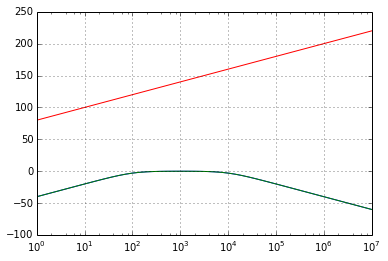

In [12]:
semilogx(ω,20*log10(abs(H)));
semilogx(ω,Gdb);
semilogx(ω,20*log10(abs(H1)))

grid()